In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal','Density']

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.isnull().sum()

Signal     0
Density    0
dtype: int64

In [7]:
df.describe()

,Signal,Density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


<AxesSubplot:xlabel='Signal', ylabel='Density'>

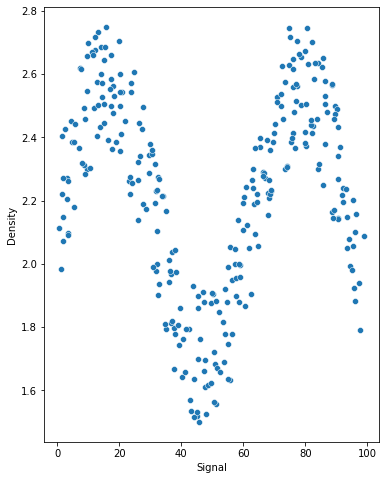

In [8]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='Signal',y='Density',data=df)

In [9]:
X=df['Signal'].values.reshape(-1,1)

In [10]:
y=df['Density']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1) for Linear Regression


In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
model=LinearRegression()

MAE: 0.2534304465565185
RMSE: 0.3032758793421545


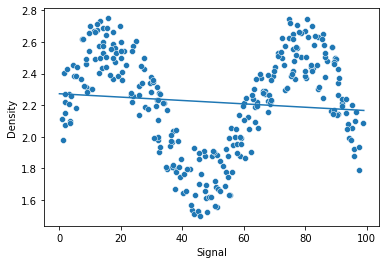

In [15]:
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
mae_LR=mean_absolute_error(y_test,y_predicted)
rmse_LR=np.sqrt(mean_squared_error(y_test,y_predicted))
print(f'MAE: {mae_LR}')
print(f'RMSE: {rmse_LR}')
    
    ## plot the results of model signal range
signal_range=np.arange(0,100)
signal_predict=model.predict(signal_range.reshape(-1,1))
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_predict)

## 2) For Polynomial Regression

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
model_1=make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

MAE: 0.12210561550594563
RMSE: 0.14952957960101984


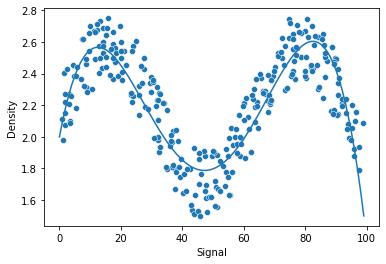

In [18]:
model_1.fit(X_train, y_train)
y_predicted=model_1.predict(X_test)
mae_poly=mean_absolute_error(y_test,y_predicted)
rmse_poly=np.sqrt(mean_squared_error(y_test,y_predicted))
print(f'MAE: {mae_poly}')
print(f'RMSE: {rmse_poly}')
    
    ## plot the results of model signal range
signal_range=np.arange(0,100)
signal_predict=model_1.predict(signal_range.reshape(-1,1))
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_predict)

## 3) For KNN:


In [19]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11593426217434058
RMSE: 0.13746385556190918


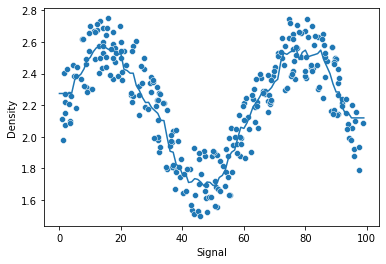

In [20]:
k_values=[13]
for n in k_values:
    model_3=KNeighborsRegressor(n_neighbors=n)
    model_3.fit(X_train, y_train)
    y_predicted=model_3.predict(X_test)
    mae_knn=mean_absolute_error(y_test,y_predicted)
    rmse_knn=np.sqrt(mean_squared_error(y_test,y_predicted))
    print(f'MAE: {mae_knn}')
    print(f'RMSE: {rmse_knn}')
    
    ## plot the results of model signal range
    signal_range=np.arange(0,100)
    signal_predict=model_3.predict(signal_range.reshape(-1,1))
    sns.scatterplot(x='Signal',y='Density',data=df)
    plt.plot(signal_range,signal_predict)

## 4) For Decision Tree


In [21]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.14917217237670705
RMSE: 0.19518866264840362


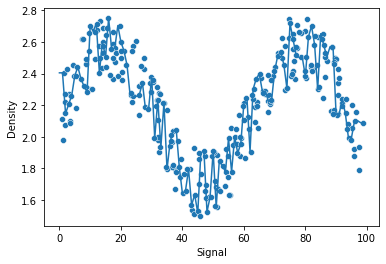

In [22]:
model_4=DecisionTreeRegressor()
model_4.fit(X_train, y_train)
y_predicted=model_4.predict(X_test)
mae_DT=mean_absolute_error(y_test,y_predicted)
rmse_DT=np.sqrt(mean_squared_error(y_test,y_predicted))
print(f'MAE: {mae_DT}')
print(f'RMSE: {rmse_DT}')
    
    ## plot the results of model signal range
signal_range=np.arange(0,100)
signal_predict=model_4.predict(signal_range.reshape(-1,1))
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_predict)


## 5) For Support Vector Machines


In [23]:
from sklearn.svm import SVR

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svr=SVR()
param_grid={'C': [0.1, 1, 5, 10],'gamma':['auto','scale']}
model_5=GridSearchCV(svr,param_grid)

MAE: 0.10870707482603327
RMSE: 0.1283687572306451


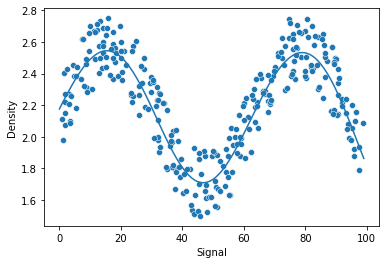

In [26]:
model_5.fit(X_train, y_train)
y_predicted=model_5.predict(X_test)
mae_svr=mean_absolute_error(y_test,y_predicted)
rmse_svr=np.sqrt(mean_squared_error(y_test,y_predicted))
print(f'MAE: {mae_svr}')
print(f'RMSE: {rmse_svr}')
    
    ## plot the results of model signal range
signal_range=np.arange(0,100)
signal_predict=model_5.predict(signal_range.reshape(-1,1))
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_predict)

In [27]:
Mean_absolute_error=[mae_LR,mae_poly,mae_knn,mae_DT,mae_svr]
Root_mean_square_error=[rmse_LR,rmse_poly,rmse_knn,rmse_DT,rmse_svr]


In [38]:
Error={'MAE':Mean_absolute_error,'RMSE':Root_mean_square_error}
Models={'Linear Regression':model,'Polynomial':model_1,'KNN':model_3,'Decision Tree':model_4,'SVM':model_4}

In [39]:
df_1=pd.DataFrame(data=Error,index=Models)
df_1

,MAE,RMSE
Linear Regression,0.253430,0.303276
Polynomial,0.122106,0.149530
KNN,0.115934,0.137464
Decision Tree,0.149172,0.195189
SVM,0.108707,0.128369


<AxesSubplot:>

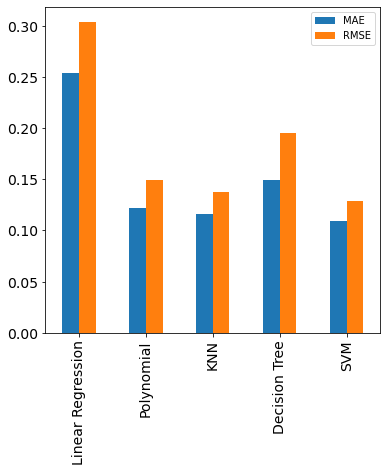

In [47]:
df_1.plot(kind='bar',figsize=(6,6),fontsize=14)
